## Credit Card fraud detection Machine learing project
All over the financial sector, many machine learning algorithms are being used and utlised to find fraudulent transactions. In this project, that is exactly what we will try to achieve as well. Using a dataset of of nearly 28,500 credit card transactions and multiple unsupervised anomaly detection algorithms such as 
**Local Outlier Factor (LOF)** and **Isolation Forest Algorithm**, we are going to find out the transactions with a high probability of being credit card fraud.
Moreover, We will employ metrics suchs as precision, recall, and F1-scores, we will find out why the classification accuracy for such algorithms can be deceptive.
The dataset can be found at https://www.kaggle.com/mlg-ulb/creditcardfraud

Along with this , we will also discover employ various data visualization techniques, such as parameter histograms and correlation matrices, to get a finer grasp of the fundamaental dispostion of data in the given data set

### Importing the libraries
Here we will call out the various libraries we require for this project of ours we do this to make our project easily reproducible and makes sure our project has all the necessary prerequisites to run the ML algorithm

In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import dabl
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))


Python: 3.8.3 (tags/v3.8.3:6f8c832, May 13 2020, 22:37:02) [MSC v.1924 64 bit (AMD64)]
Numpy: 1.19.0
Pandas: 1.0.5
Matplotlib: 3.2.2
Seaborn: 0.10.1
Scipy: 1.4.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Data Preprocessing
In the following cells, we will import our dataset from a .csv file. Furthermore, we will begin exploring the dataset to gain an understanding of the various factors of our dataset such as type, quantity, and distribution of data in our dataset. For this purpose, we will use Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix.

In [3]:
#loading the dataset
dft=pd.read_csv("creditcard.csv")

In [4]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print(dft.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
print("Rows of the dataset:", dft.shape[0], "and Columns in the dataset:",dft.shape[1])  #columns =31 and rows=294807 data.shape shows (rows,cols)

Rows of the dataset: 284807 and Columns in the dataset: 31


In [7]:
print(dft.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709


So after using describe we come to realize that in almost all the cases the values of mean is very close to zero and the data also seems clean showing us that this data has already went through A Princial Component Analysis

***

## checking if there are any missing values or not
we take take the sum and percentage of all the values and we concatenate them to see wheather these values have any missing values or not

In [8]:
total = dft.isnull().sum().sort_values(ascending = False)
percent = (dft.isnull().sum()/dft.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Data is having no missing values

***

(28481, 31)


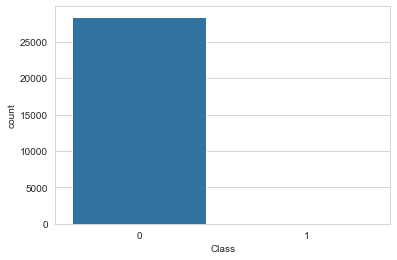

In [9]:
dft=dft.sample(frac=0.1,random_state=1)
print(dft.shape)
sns.set_style("whitegrid")
sns.countplot(x="Class",data=dft);
#we take a sample size of 10% of the entire data and random state one so we get the same data every time we run the code

so we can clearly see that the data is not balanced at all 

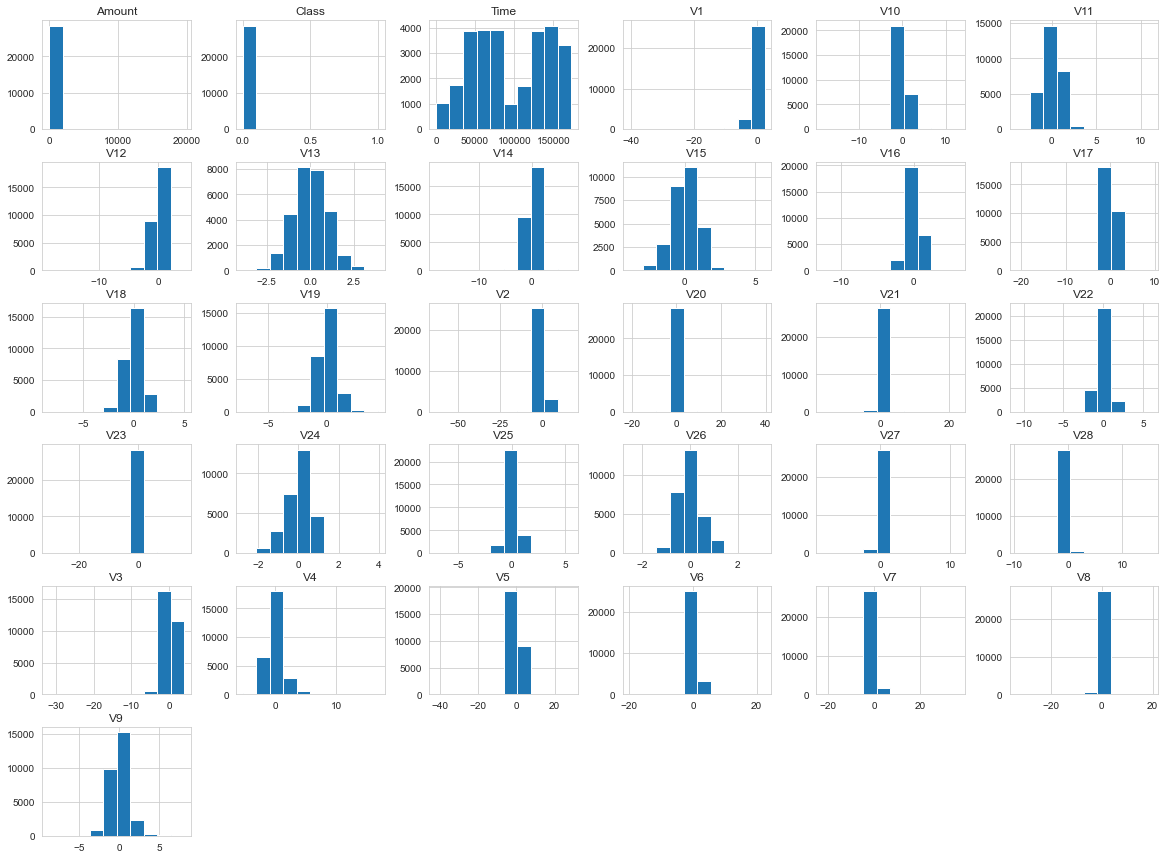

In [10]:
sns.set_style('whitegrid')
dft.hist(figsize=(20,15));


In [11]:
Fraud=dft[dft['Class']==1]
#sets jo "0" class vala hai vo valid hai aurr baki invalid
Valid=dft[dft['Class']==0]
outlier_frac=len(Fraud)/len(Valid)
print(outlier_frac)
print("Fraud Cases:{}".format(len(Fraud)))
print("Valid cases:{}".format(len(Valid)))

0.0017234102419808666
Fraud Cases:49
Valid cases:28432


Correlation matrix to see if there is any strong correlations between any variables in our data set and checking for ID and checking for linear relationships as well as making data easy for calssification 

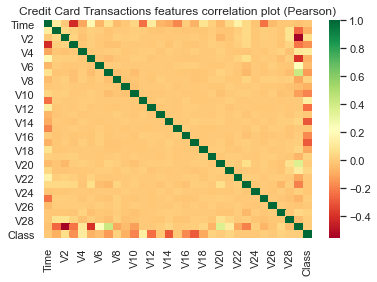

In [12]:
corrmat=dft.corr()
sns.set(font_scale=1)
plt.title('Credit Card Transactions features correlation plot (Pearson)')
sns.set_style('whitegrid')
plt.figsize=(20,20)
top_corr_features=corrmat.index
sns.heatmap(dft[top_corr_features].corr(),cmap="RdYlGn",annot_kws={"size": 15})
plt.show()

In [13]:
columns=dft.columns.tolist()
columns=[c for c in columns if c not in ['Class']]
target='Class'
x=dft[columns]
y=dft[target]
print(x.shape)
print(y.shape)


(28481, 30)
(28481,)


### Unsupervised Outlier Detection
Now that we have processed our data, we can begin installing our machine learning algorithms. We will utilise the following ML algoritms:

- **Local Outlier Factor (LOF)**

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood.

- **Isolation Forest Algorithm**

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [21]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
#define a random state
state=1
classifiers={
    "Isolation Forest":IsolationForest(max_samples=len(x),
                                       contamination=outlier_frac,
                                       random_state=state),
     "Local Outlier Factor":LocalOutlierFactor(
         n_neighbors=20,
         contamination=outlier_frac)
 }

In [15]:
plt.figure(figsize=(10,7))
n_outliers=len(Fraud)
for i,(clf_name,clf) in enumerate(classifiers.items()):
    if clf_name=="Local Outlier Factor":
        y_pred=clf.fit_predict(x)
        scores_pred=clf.negative_outlier_factor_
    else:
        clf.fit(x)
        scores_pred=clf.decision_function(x)
        y_pred=clf.predict(x)
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
    n_errors=(y_pred!=y).sum()
    #run classification matrices
    print("{}:{}".format(clf_name,n_errors))
    print(accuracy_score(y,y_pred))
    print(classification_report(y,y_pred))

Isolation Forest:71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor:97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



<Figure size 720x504 with 0 Axes>

### END HYPOTHESIS
- **Local Outlier Factor (LOF)** 
Now as we can see after running this model that the the accuracy of our model is very high at 99.65% which is very nice to see however when we look at the precision of our model we come to realize that we very accuractly could find the the valid credit card but we failed to find the the fraud credit card as our precision counts for false postives while our recall is also 1 for valid credit cards but 0.02 for fraudlent ones showing a high amount of false Negatives in that result
- **Isolation Forests result**
    As we can can clearly see that this model is more accurate than LOF with an accuracy of 99.75% and it has a better fraud detection precision too so that means we will have relatively fewer false postives and fewer false negatives and also the F-score is better showing that this algorithm is indeed better for predicting our results


***

## **SUMMARY**
Here in  this project we have successfully
- imported a csv dataset using "pandas"
- preprocessing the dataset
- describing the data 
- Checked if the dataset was balanced
- We made histogram to check for any particular parameters which stood out
- we seperated the data
- we made a correlation matrix and tried to find variations to make decent predictions
- We made seperated the data based on our target variable which was class
- Then we used 2 seperate methods Isolation forests and Local Outlier factor to do prediction on our data set

***

## Limitations
- the question comes why is our algorithm so accurate in both the cases even if our precision in finding the wrong cases is so low it's because the fact that our data set is heavily unbalanced and it has a very high number of valid cases while the fraud cases are just .0172% of the total credit card transactions
- Dataset can have more precise predictions with a neural network but idk how to employ a neural network yet